In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import seaborn as sns

In [54]:
las = lasio.read('Gorgonichthys_1_suite3_supercombo_log.las')
df = las.df()
df.head()

,AT10,AT20,AT30,AT60,AT90,CALI,DRHO,DT2,DTCO,DTSM,GR,PEF,PR,RHOB,RT,SPHI,TNPH,VPVS
DEPTH,,,,,,,,,,,,,,,,,,
4775.7588,4.675,4.591,4.656,4.755,4.827,8.041,0.154,167.465,79.789,167.465,195.824,6.827,0.353,2.749,210.536,0.186,0.434,2.099
4775.6064,4.675,4.591,4.655,4.755,4.827,8.041,0.154,167.465,79.789,167.465,195.824,6.827,0.353,2.749,4.801,0.186,0.434,2.099
4775.4540,4.675,4.591,4.655,4.756,4.827,8.041,0.154,167.465,79.789,167.465,195.824,6.827,0.353,2.749,4.801,0.186,0.434,2.099
4775.3016,4.675,4.591,4.655,4.756,4.827,8.041,0.154,167.465,79.789,167.465,195.824,6.827,0.353,2.749,4.801,0.186,0.434,2.099
4775.1492,4.675,4.591,4.655,4.756,4.827,8.041,0.154,167.465,79.789,167.465,195.824,6.827,0.353,2.749,4.801,0.186,0.434,2.099


In [55]:
print(las.curves)

Mnemonic  Unit  Value  Description                               
--------  ----  -----  -----------                               
DEPTH     M            DEPTH (BOREHOLE)                          
AT10      OHMM         Array Induction Two Foot Resistivity A10  
AT20      OHMM         Array Induction Two Foot Resistivity A20  
AT30      OHMM         Array Induction Two Foot Resistivity A30  
AT60      OHMM         Array Induction Two Foot Resistivity A60  
AT90      OHMM         Array Induction Two Foot Resistivity A90  
CALI      IN           Caliper                                   
DRHO      G/C3         Bulk Density Correction                   
DT2       US/F         Delta-T Shear - Upper Dipole              
DTCO      US/F         Delta-T Compressional                     
DTSM      US/F         Delta-T Shear                             
GR        GAPI         Gamma Ray                                 
PEF                    Photoelectric Factor                      
PR        

In [56]:
df.reset_index(inplace=True)
df.head()

,DEPTH,AT10,AT20,AT30,AT60,AT90,CALI,DRHO,DT2,DTCO,DTSM,GR,PEF,PR,RHOB,RT,SPHI,TNPH,VPVS
0,4775.7588,4.675,4.591,4.656,4.755,4.827,8.041,0.154,167.465,79.789,167.465,195.824,6.827,0.353,2.749,210.536,0.186,0.434,2.099
1,4775.6064,4.675,4.591,4.655,4.755,4.827,8.041,0.154,167.465,79.789,167.465,195.824,6.827,0.353,2.749,4.801,0.186,0.434,2.099
2,4775.4540,4.675,4.591,4.655,4.756,4.827,8.041,0.154,167.465,79.789,167.465,195.824,6.827,0.353,2.749,4.801,0.186,0.434,2.099
3,4775.3016,4.675,4.591,4.655,4.756,4.827,8.041,0.154,167.465,79.789,167.465,195.824,6.827,0.353,2.749,4.801,0.186,0.434,2.099
4,4775.1492,4.675,4.591,4.655,4.756,4.827,8.041,0.154,167.465,79.789,167.465,195.824,6.827,0.353,2.749,4.801,0.186,0.434,2.099


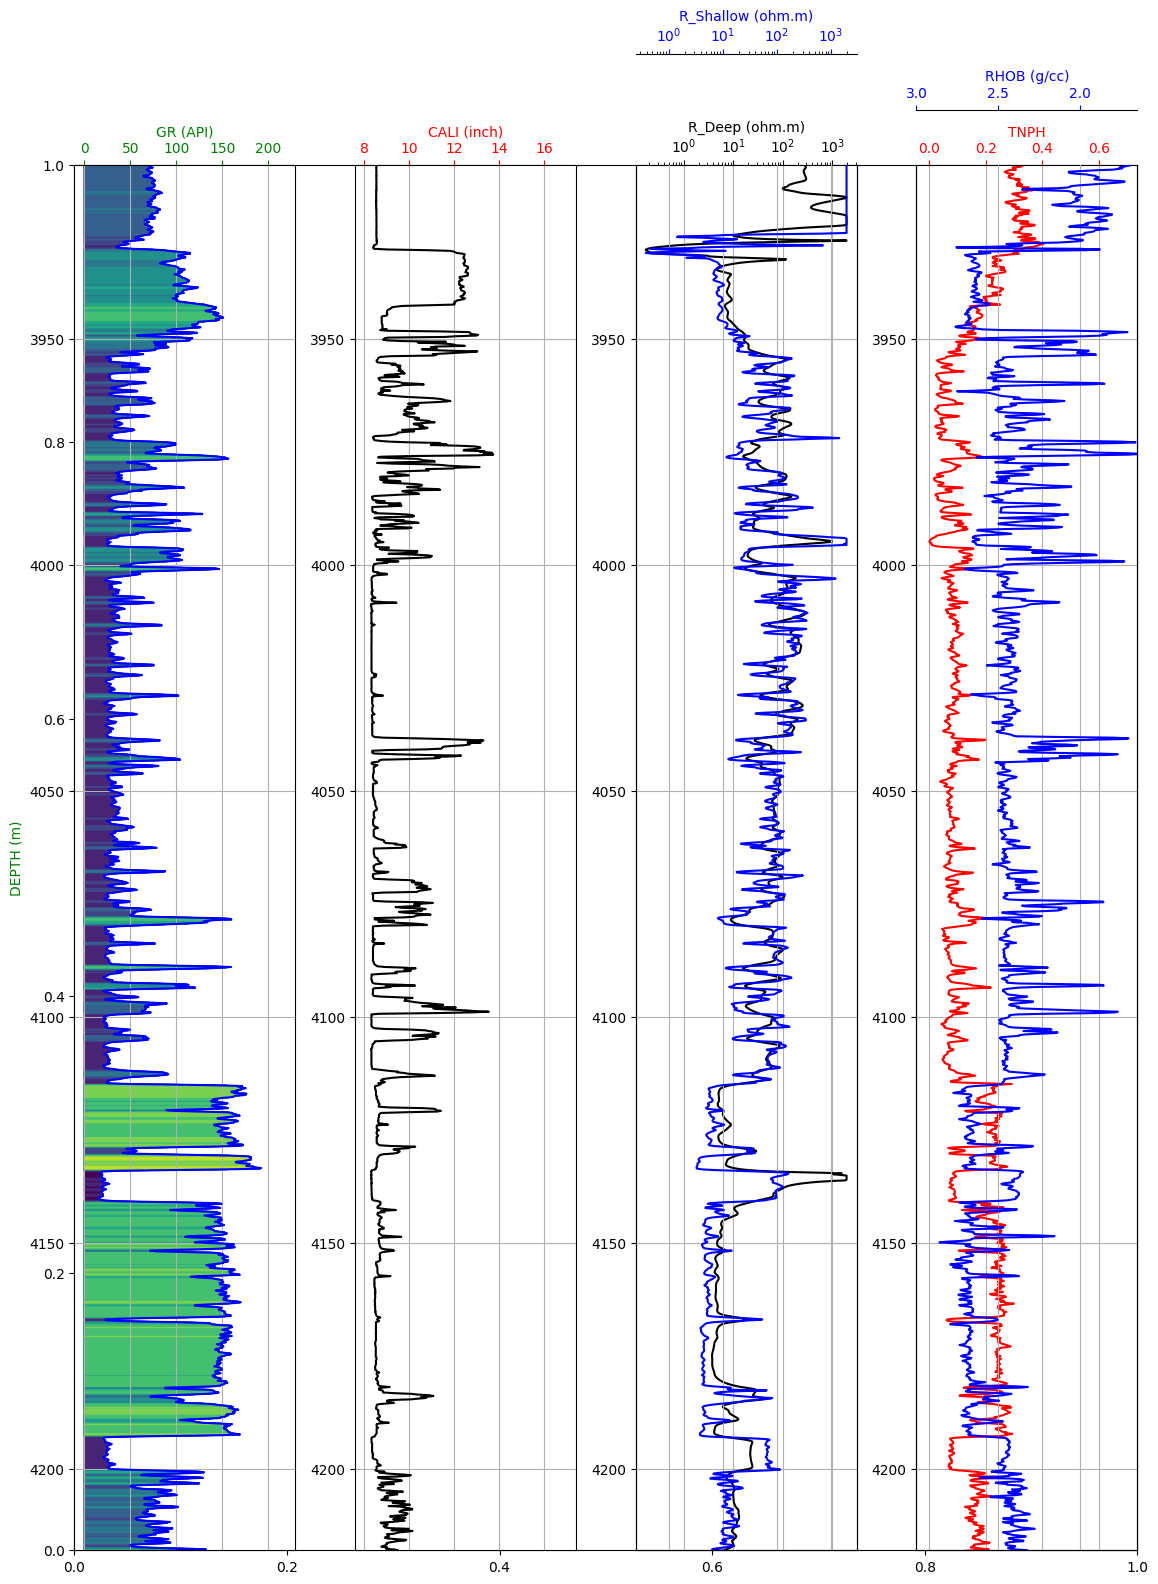

In [57]:
fig, axes = plt.subplots(figsize=(12,16))

ax1 = plt.subplot2grid((1,4),(0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1,4),(0,1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1,4),(0,2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((1,4),(0,3), rowspan=1, colspan=1)
# ax5 = plt.subplot2grid((1,6),(0,4), rowspan=1, colspan=1)

ax1.plot(df['GR'], df['DEPTH'], c='b')
ax1.set_ylim(4218,3911.5)

left_value = 0
right_value = 200
span = abs(left_value-right_value)
cmap = plt.get_cmap()
color_index = np.arange(left_value, right_value, span/10)

for index in sorted(color_index):
    index_value = (index - left_value)/span
    color = cmap(index_value)
    
    ax1.fill_betweenx(df['DEPTH'], left_value, df['GR'], where=df['GR']>=index, color=color)
    
ax1.spines['top'].set_position(('outward', 0))
ax1.tick_params(axis='x', colors='g')
ax1.set_xlabel("GR (API)", color='g')
ax1.set_ylabel("DEPTH (m)", color='g')
ax1.xaxis.tick_top()
# ax1.axhline(y=4002,color='red')
# ax1.axhline(y=4077,color='red')
# ax1.axhline(y=4079,color='red')
# ax1.axhline(y=4115,color='red')
# ax1.axhline(y=4133.8,color='red')
# ax1.axhline(y=4140.8,color='red')
# ax1.axhline(y=4193.1,color='red')
# ax1.axhline(y=4200.5,color='red')
# ax1.axhline(y=4134,color='red')
# ax1.axhline(y=4141,color='red')
ax1.xaxis.set_label_position('top')
ax1.grid(True)


ax2.plot(df['CALI'], df['DEPTH'], c='black')
ax2.set_ylim(4218,3911.5)
ax2.spines['top'].set_position(('outward', 0))
ax2.tick_params(axis='x', colors='r')
ax2.set_xlabel("CALI (inch)", color='r')
#ax2.set_ylabel("DEPTH (m)", color='r')
ax2.xaxis.tick_top()
# ax2.axhline(y=4002,color='red')
# ax2.axhline(y=4077,color='red')
# ax2.axhline(y=4079,color='red')
# ax2.axhline(y=4115,color='red')
# ax2.axhline(y=4133.8,color='red')
# ax2.axhline(y=4140.8,color='red')
# ax2.axhline(y=4193.1,color='red')
# ax1.axhline(y=4200.5,color='red')
ax2.xaxis.set_label_position('top')
ax2.grid(True)


# ax3_2 = ax3.twiny()
ax3_3 = ax3.twiny()

ax3.plot(df['RT'], df['DEPTH'], c='black')
ax3.spines['top'].set_position(('outward',0))
ax3.tick_params(axis='x', colors='black')
ax3.set_xlabel("R_Deep (ohm.m)", color='black')
ax3.xaxis.tick_top()
ax3.semilogx()
ax3.xaxis.set_label_position('top')
# ax3.axhline(y=4002,color='red')
# ax3.axhline(y=4077,color='red')
# ax3.axhline(y=4079,color='red')
# ax3.axhline(y=4115,color='red')
# ax3.axhline(y=4133.8,color='red')
# ax3.axhline(y=4140.8,color='red')
# ax3.axhline(y=4193.1,color='red')
# ax3.axhline(y=4200.5,color='red')
ax3.grid(True)
ax3.set_ylim(4218,3911.5)

# ax3_2.plot(df['AT30'], df['DEPTH'], c='red')
# ax3_2.spines['top'].set_position(('outward',40))
# ax3_2.tick_params(axis='x', colors='red')
# ax3_2.set_xlabel("R_Mid (ohm.m)", color='red')
# ax3_2.xaxis.tick_top()
# ax3_2.semilogx()
# ax3_2.xaxis.set_label_position('top')
# ax3_2.grid()
# ax3_2.set_ylim(4467,3911.5)

ax3_3.plot(df['AT10'], df['DEPTH'], c='blue')
ax3_3.spines['top'].set_position(('outward',80))
ax3_3.tick_params(axis='x', colors='blue')
ax3_3.set_xlabel("R_Shallow (ohm.m)", color='blue')
ax3_3.xaxis.tick_top()
ax3_3.semilogx()
ax3_3.xaxis.set_label_position('top')
# ax3_3.axhline(y=4002,color='red')
# ax3_3.axhline(y=4077,color='red')
# ax3_3.axhline(y=4079,color='red')
# ax3_3.axhline(y=4115,color='red')
# ax3_3.axhline(y=4133.8,color='red')
# ax3_3.axhline(y=4140.8,color='red')
# ax3_3.axhline(y=4193.1,color='red')
# ax3_3.axhline(y=4200.5,color='red')
ax3_3.grid(True)
ax3_3.set_ylim(4218,3911.5)


ax4_2 = ax4.twiny()


ax4.plot(df['TNPH'], df['DEPTH'], c='r')
ax4.set_ylim(4218,3911.5)
ax4.spines['top'].set_position(('outward', 0))
ax4.tick_params(axis='x', colors='r')
ax4.set_xlabel("TNPH", color='r')
#ax4.set_ylabel("DEPTH (m)", color='r')
ax4.xaxis.tick_top()
ax4.xaxis.set_label_position('top')
# ax4.axhline(y=4002,color='red')
# ax4.axhline(y=4077,color='red')
# ax4.axhline(y=4079,color='red')
# ax4.axhline(y=4115,color='red')
# ax4.axhline(y=4133.8,color='red')
# ax4.axhline(y=4140.8,color='red')
# ax4.axhline(y=4193.1,color='red')
# ax4.axhline(y=4200.5,color='red')
ax4.grid(True)

ax4_2.plot(df['RHOB'], df['DEPTH'], c='blue')
ax4_2.set_ylim(4218,3911.5)
ax4_2.spines['top'].set_position(('outward', 40))
ax4_2.tick_params(axis='x', colors='blue')
ax4_2.set_xlabel("RHOB (g/cc)", color='blue')
#ax4_2.set_ylabel("DEPTH (m)", color='blue')
ax4_2.xaxis.tick_top()
# ax4_2.xaxis.set_label_position('top')
# ax4_2.axhline(y=4002,color='red')
# ax4_2.axhline(y=4077,color='red')
# ax4_2.axhline(y=4079,color='red')
# ax4_2.axhline(y=4115,color='red')
# ax4_2.axhline(y=4133.8,color='red')
# ax4_2.axhline(y=4140.8,color='red')
# ax4_2.axhline(y=4193.1,color='red')
# ax4_2.axhline(y=4200.5,color='red')
ax4_2.set_xlim(3,1.65)
ax4_2.grid(True)


# ax5.plot(df['DTCO'], df['DEPTH'], c='black')
# ax5.set_ylim(4467,3911.5)
# ax5.spines['top'].set_position(('outward', 0))
# ax5.tick_params(axis='x', colors='black')
# ax5.set_xlabel("DTC(microfeet/s)", color='black')
# #ax5.set_ylabel("DEPTH (m)", color='black')
# ax5.xaxis.tick_top()
# ax5.xaxis.set_label_position('top')
# ax5.grid()


# for ax in [ax2, ax3, ax4]:
#     plt.setp(ax.get_yticklabels(), visible=False)

# fig.suptitle("Well - GORGONICHTHYS-1 ", fontsize=25)

plt.tight_layout()
plt.show()

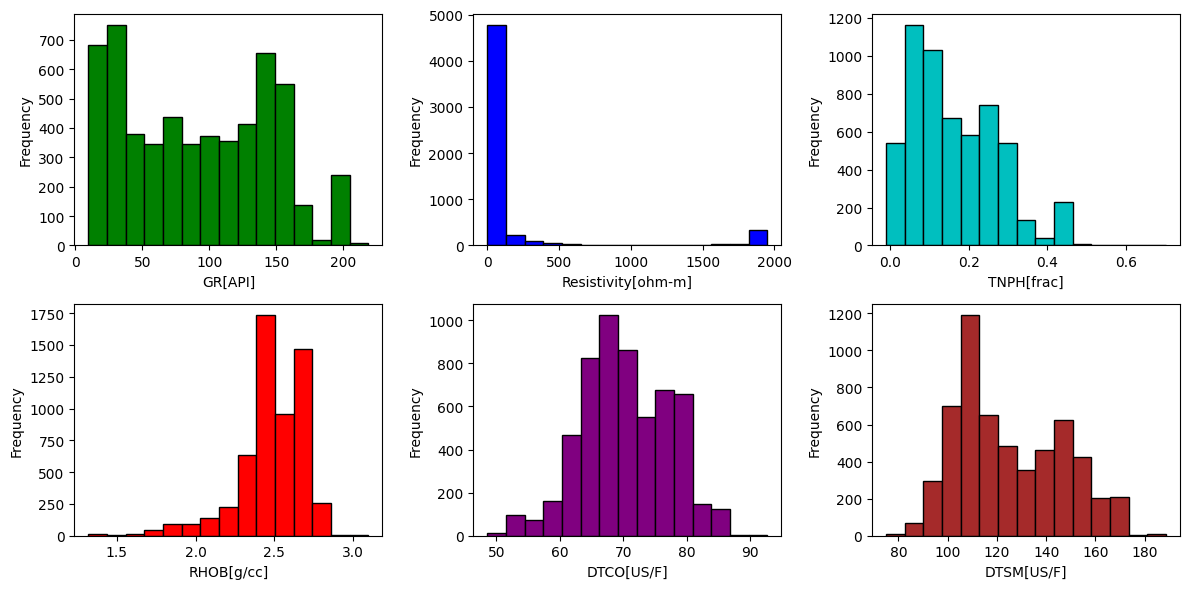

In [58]:
# Histogram plot of GR, SP, NPHI, RHOB

plt.figure(1, figsize=(12,6))
plt.subplot(231)
plt.hist(df.GR.dropna(), bins=15, color='g', edgecolor='k')
plt.xlabel('GR[API]')
plt.ylabel('Frequency')
#plt.xlim(0,150)
#plt.grid(True)

plt.subplot(232)
plt.hist(df.RT.dropna(), bins=15, color='b', edgecolor='k')
plt.xlabel('Resistivity[ohm-m]')
plt.ylabel('Frequency')
#plt.grid(True)

plt.subplot(233)
plt.hist(df.TNPH.dropna(), bins=15, color='c', edgecolor='k')
plt.xlabel('TNPH[frac]')
plt.ylabel('Frequency')
#plt.grid(True)

plt.subplot(234)
plt.hist(df.RHOB.dropna(), bins=15, color='r', edgecolor='k')
plt.xlabel('RHOB[g/cc]')
plt.ylabel('Frequency')
#plt.grid(True)


plt.subplot(235)
plt.hist(df.DTCO.dropna(), bins=15, color='purple', edgecolor='k')
plt.xlabel('DTCO[US/F]')
plt.ylabel('Frequency')
#plt.grid(True)

plt.subplot(236)
plt.hist(df.DTSM.dropna(), bins=15, color='brown', edgecolor='k')
plt.xlabel('DTSM[US/F]')
plt.ylabel('Frequency')
#plt.grid(True)


plt.tight_layout()
plt.show()
#plt.subplots_adjust(top=1.2, bottom=.1, left=0.10, right=0.9, hspace=0.25, wspace=0.35)
#plt.savefig('histogram_v2.png', dpi =250, format = 'png')

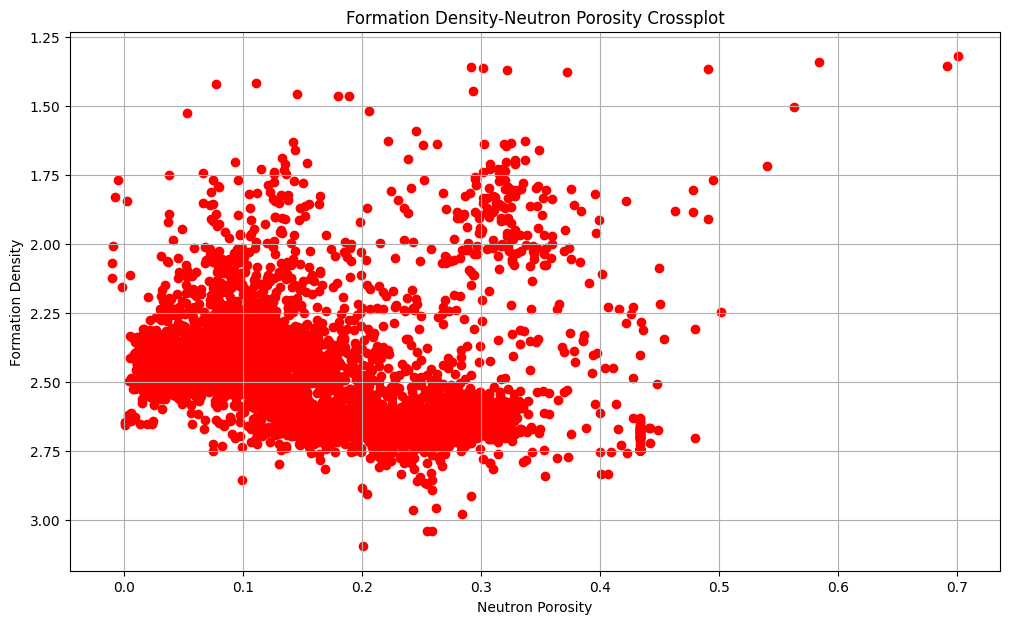

In [59]:
fig,ax=plt.subplots(figsize=(12,7))
plot=ax.scatter(x=df['TNPH'],y=df['RHOB'],color='r')
# ax.text(0.06,1.8,'Gas Correction',
#             bbox=dict(boxstyle='circle,pad=0.3',alpha=0.3,facecolor='green'))
ax.set_xlabel('Neutron Porosity')
ax.set_ylabel('Formation Density')
ax.set_title('Formation Density-Neutron Porosity Crossplot')
ax.invert_yaxis()
ax.grid(True)
# plt.colorbar(plot,label='Volume of Shale (cc)')
plt.show()

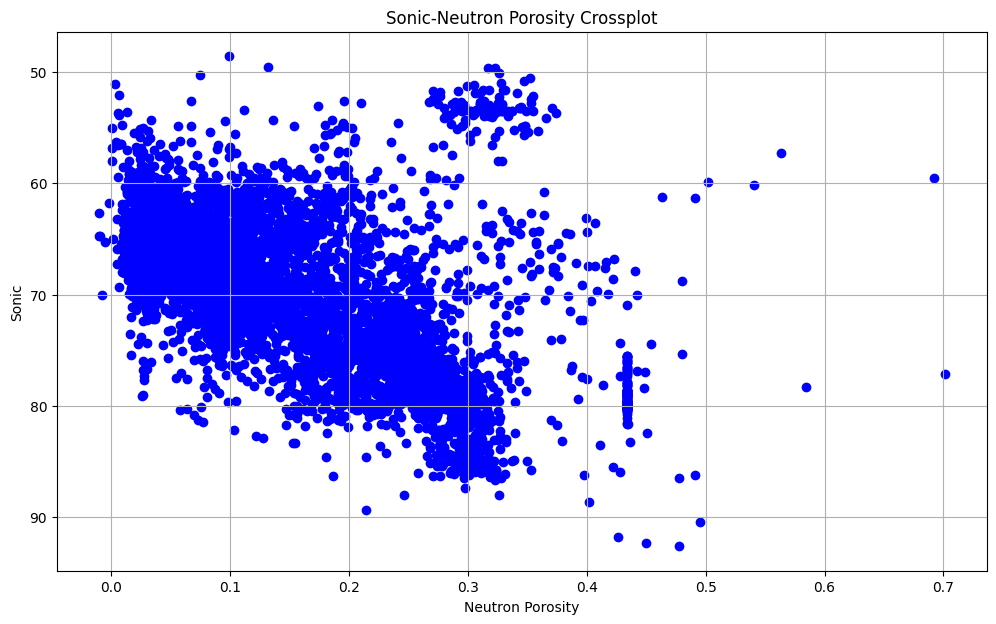

In [60]:
fig,ax=plt.subplots(figsize=(12,7))
plot=ax.scatter(x=df['TNPH'],y=df['DTCO'],color='blue')
# ax.text(0.06,1.8,'Gas Correction',
#             bbox=dict(boxstyle='circle,pad=0.3',alpha=0.3,facecolor='green'))
ax.set_xlabel('Neutron Porosity')
ax.set_ylabel('Sonic')
ax.set_title('Sonic-Neutron Porosity Crossplot')
ax.invert_yaxis()
ax.grid(True)
# plt.colorbar(plot,label='Volume of Shale (cc)')
plt.show()

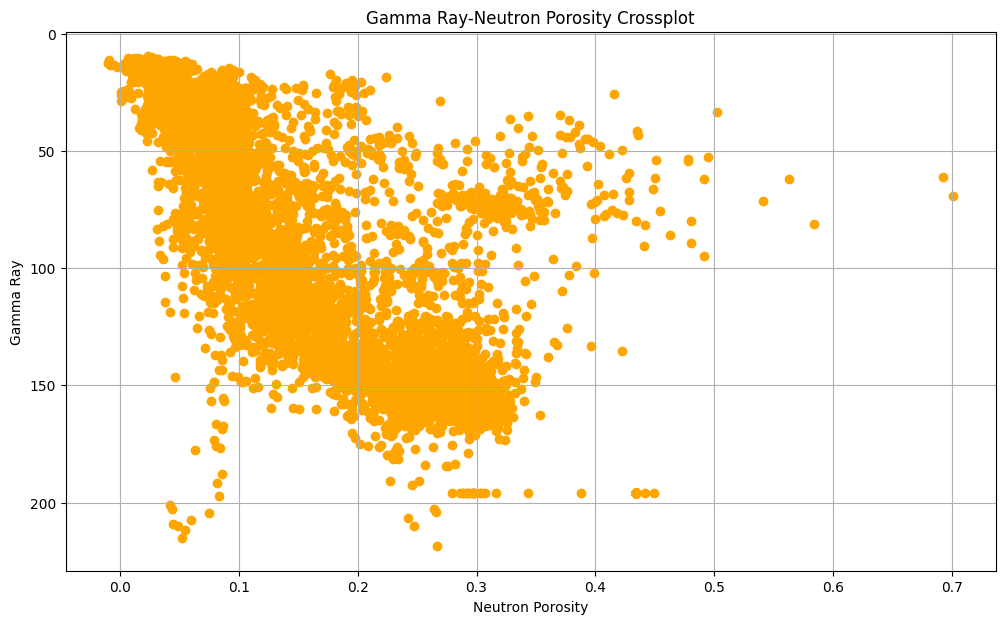

In [61]:
fig,ax=plt.subplots(figsize=(12,7))
plot=ax.scatter(x=df['TNPH'],y=df['GR'],color='orange')
# ax.text(0.06,1.8,'Gas Correction',
#             bbox=dict(boxstyle='circle,pad=0.3',alpha=0.3,facecolor='green'))
ax.set_xlabel('Neutron Porosity')
ax.set_ylabel('Gamma Ray')
ax.set_title('Gamma Ray-Neutron Porosity Crossplot')
ax.invert_yaxis()
ax.grid(True)
# plt.colorbar(plot,label='Volume of Shale (cc)')
plt.show()

p05 : 15.3999
p95:  170.7985


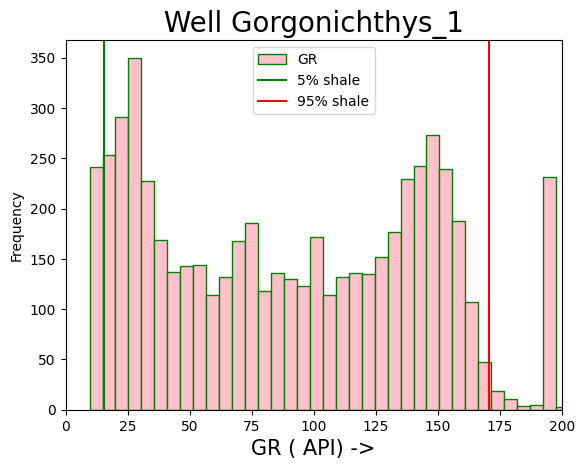

In [62]:
df['GR'].plot(kind = 'hist',bins = 40, density = False, edgecolor = 'green',color='pink')
#df['GR'].plot(kind='kde', color = 'black')
plt.xlabel("GR ( API) ->", fontsize=15)
#plt.ylabel("Depth (m) ->", fontsize=15)
plt.xlim(0,200)
plt.title(" Well Gorgonichthys_1 ", size=20)
#mean= df['GR'].mean()
p05 = df['GR'].quantile(0.05)
p95 = df['GR'].quantile(0.95)
#print("Mean :", mean)
print("p05 :", p05)
print("p95: ", p95)
#plt.axvline(mean, color='green', label ='mean')
plt.axvline(p05, color='g', label ='5% shale')
plt.axvline(p95, color='r', label ='95% shale')
plt.legend()

In [63]:
GRmin = p05
GRmax = p95
I_GR = (df['GR']- GRmin ) / ( GRmax - GRmin )
Vshale = 0.33*((2**(2*I_GR)) -1)
print(I_GR)
print(max(I_GR),min(I_GR))
print(Vshale)

0       1.161041
1       1.161041
2       1.161041
3       1.161041
4       1.161041
          ...   
5683    0.376310
5684    0.385197
5685    0.366420
5686    0.385326
5687    0.385326
Name: GR, Length: 5688, dtype: float64
1.307927484546193 -0.03711037293772275
0       1.320175
1       1.320175
2       1.320175
3       1.320175
4       1.320175
          ...   
5683    0.226001
5684    0.232893
5685    0.218429
5686    0.232993
5687    0.232993
Name: GR, Length: 5688, dtype: float64


In [64]:
# Evaluting Density porosity

for i in Vshale :
        if i >= 0.4 :
                rho_ma = 2.80            # Condition to calculate rho_ma 
        else :
                rho_ma = 2.65
        

        rho_f = 0.8                          # unit gm/cc
        
        # Now we are trying to calculate the density porosity through the density log :
        
        phi_d = ( rho_ma - df['RHOB'] ) / ( rho_ma - rho_f )
        
print(phi_d)       

0      -0.053514
1      -0.053514
2      -0.053514
3      -0.053514
4      -0.053514
          ...   
5683    0.462703
5684    0.458378
5685    0.457297
5686    0.457297
5687    0.457297
Name: RHOB, Length: 5688, dtype: float64


In [65]:
PHI_T = (0.5*phi_d) + (0.5*df['TNPH'])   # Total porosity
PHI_T
print(max(PHI_T),min(PHI_T))

0.7096891891891892 -0.020040540540540594


In [66]:
S_Wa = (R_w/(((PHI_T)**1.8)*df['RT']))**0.5     # a = 1, m = 1.8, n = 2 
S_Wa
print(max(S_Wa),min(S_Wa))

5.748280475879861 0.01845721206661485


In [68]:
dp=df['DEPTH']
dp1=np.array(dp)
print(dp1)
for i in range(len(dp1)):
    if (dp1[i]>4002) & (dp1[i]<4077):
        phi_dn[i]=phi_d[i]*0.8
    elif (dp1[i]>4079) & (dp1[i]<4115):
        phi_dn[i]=phi_d[i]*0.8
    elif (dp1[i]>4133.8) & (dp1[i]<4140.8):
        phi_dn[i]=phi_d[i]*0.8
    elif (dp1[i]>4193.1) & (dp1[i]<4200.5):
        phi_dn[i]=phi_d[i]*0.8
    else:
        phi_dn[i]=phi_d[i]
print(phi_dn)

[4775.7588 4775.6064 4775.454  ... 3909.3648 3909.2124 3909.06  ]


NameError: name 'phi_dn' is not defined

In [ ]:
a = 0.5
b = 0.5

PHI_TN = ((a*phi_dn) + (b*df['TNPH']))   # Total porosity
PHI_TN
print(max(PHI_TN),min(PHI_TN))

NameError: name 'phi_dn' is not defined

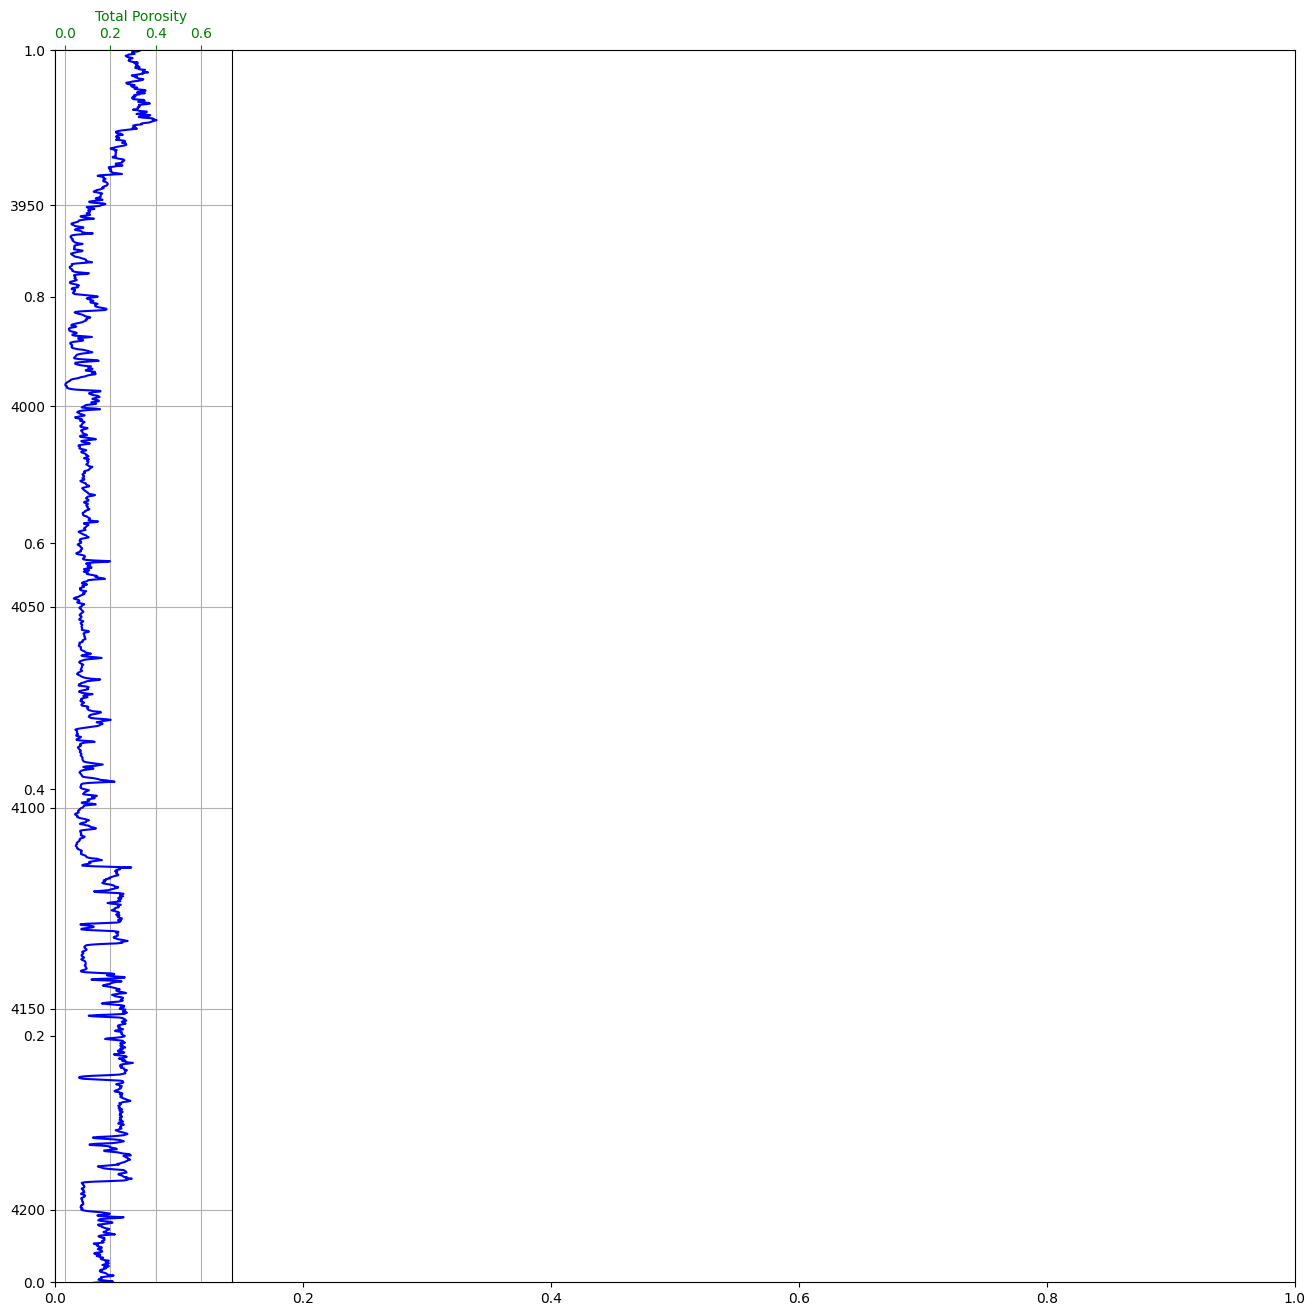

In [69]:
fig, axes = plt.subplots(figsize=(16,16))

ax2 = plt.subplot2grid((1,6),(0,0), rowspan=1, colspan=1)
ax2.plot(PHI_TN, df['DEPTH'], c='b')
ax2.set_ylim(4218,3911.5)
ax2.spines['top'].set_position(('outward', 0))
ax2.tick_params(axis='x', colors='g')
ax2.set_xlabel("Total Porosity ", color='g')
#ax2.set_ylabel("DEPTH (m)", color='r')
ax2.xaxis.tick_top()
# ax2.axhline(y=4134,color='red')
# ax2.axhline(y=4141,color='red')
ax2.xaxis.set_label_position('top')
ax2.grid(True)
plt.show()

In [70]:

R_w=0.12
PHI_TN = df['TNPH']

In [71]:
S_wa = (R_w/(((PHI_TN)**1.8)*df['RT']))**0.5     # a = 1, m = 1.8, n = 2 
S_wa
print(max(S_wa),min(S_wa))

5.957596084563691 0.019148589926610303


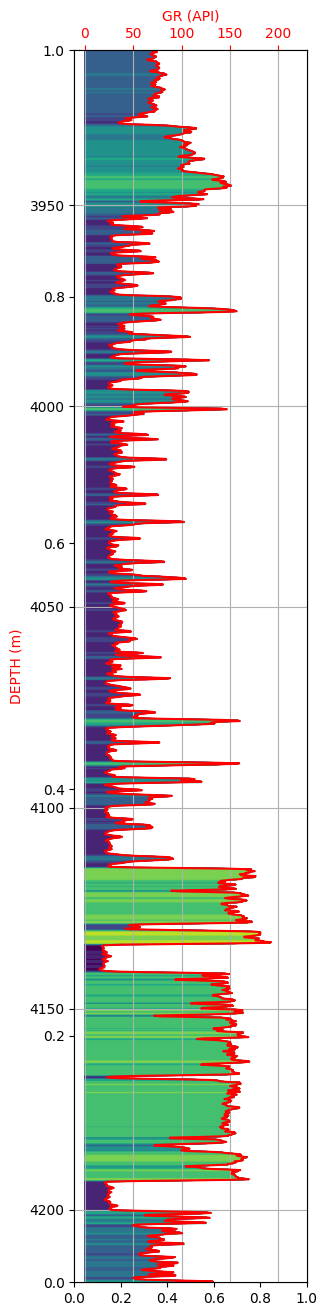

In [93]:
fig, axes = plt.subplots(figsize=(3,16))

ax1 = plt.subplot2grid((1,1),(0,0), rowspan=1, colspan=1)

ax1.plot(df['GR'], df['DEPTH'], c='r')
ax1.set_ylim(4218,3911.5)

left_value = 0
right_value = 200
span = abs(left_value-right_value)
cmap = plt.get_cmap()
color_index = np.arange(left_value, right_value, span/10)

for index in sorted(color_index):
    index_value = (index - left_value)/span
    color = cmap(index_value)
    ax1.fill_betweenx(df['DEPTH'], left_value, df['GR'], where=df['GR']>=index, color=color)

ax1.spines['top'].set_position(('outward', 0))
ax1.tick_params(axis='x', colors='r')
ax1.set_xlabel("GR (API)", color='r')
ax1.set_ylabel("DEPTH (m)", color='r')
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
# ax1.axhline(y=4002,color='red')
# ax1.axhline(y=4077,color='red')
# ax1.axhline(y=4079,color='red')
# ax1.axhline(y=4115,color='red')
ax1.grid(True)

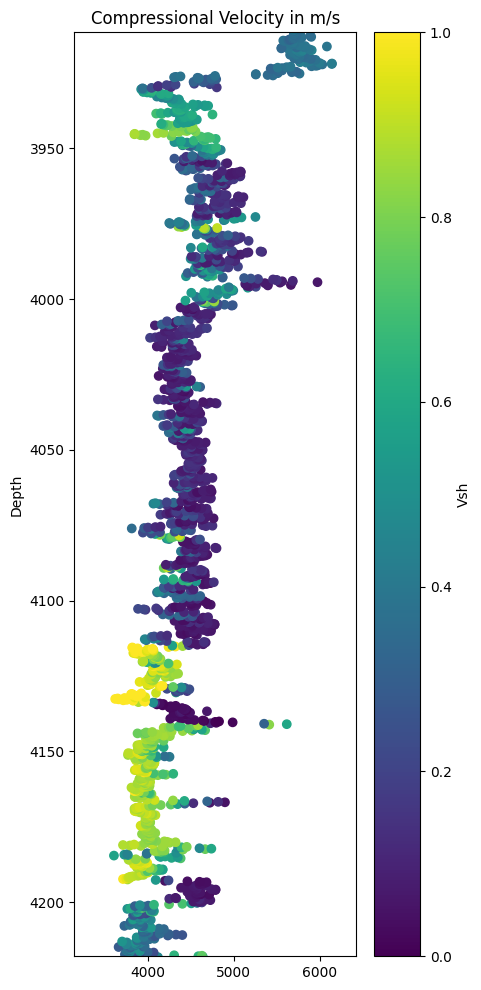

In [100]:
fig=plt.figure(figsize=(10,12))
plt.subplot(121)
X1=304800/(df.DTCO)
Y1=304800/(df.DTSM)
plt.scatter(x=X1,y=df.DEPTH,c=I_GR,vmin=0,vmax=1)
plt.title('Compressional Velocity in m/s')
plt.ylim(4218,3911.5)
plt.ylabel('Depth')
plt.colorbar(label='Vsh')
plt.show()

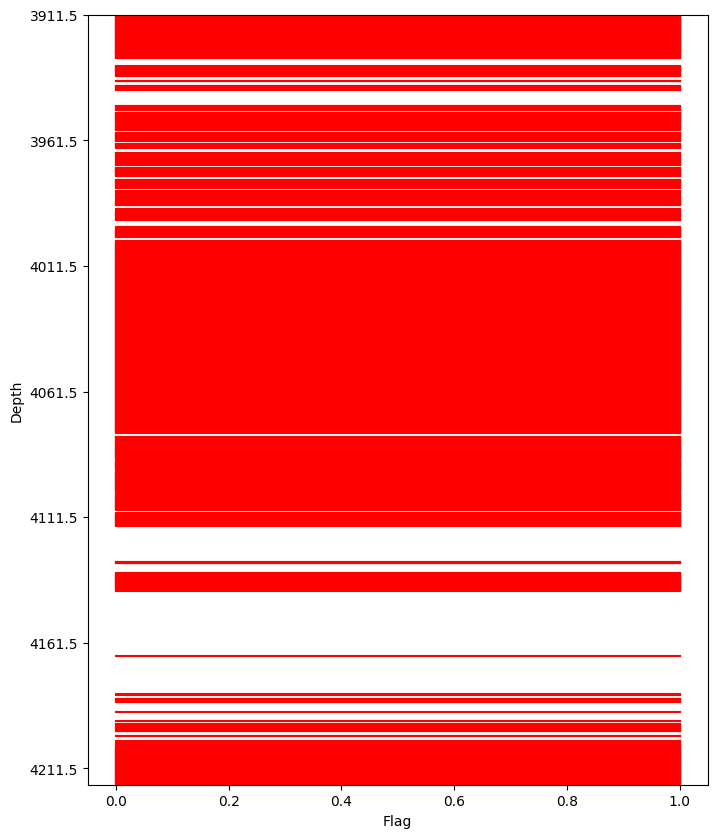

In [74]:
Vshale1 = np.array(Vshale)
S_wa1 = np.array(S_wa)
fig = plt.figure(figsize=(8,10))
# print(len(I_GR1),len(S_wa1),len(df['DEPTH']))
for i in range(len(df['DEPTH'])):
    # Check if the condition is satisfied at this depth
    if (Vshale1[i] <= 0.4) & (S_wa1[i] <= 0.7):
        # If the condition is satisfied, plot a line from x=0 to x=1 at this depth
        plt.plot([0, 1], [df['DEPTH'].iloc[i], df['DEPTH'].iloc[i]], color='r')
        
# Set the y-axis limits to be the same as the depth range in the DataFrame
plt.ylim(df['DEPTH'].max(), df['DEPTH'].min())

# Set the x-axis limits to be 0 to 1
# plt.xlim(0, 1)
plt.yticks(np.arange(3911.5,4218,50))
# Label the axes
plt.xlabel('Flag')
plt.ylabel('Depth')
plt.ylim(4218,3911.5)
plt.show()

In [75]:
Res_flag=np.zeros(len(Vshale1))
for i in range(len(Res_flag)):
    if Vshale1[i]<=0.4 and S_wa1[i]<=0.7:
        Res_flag[i]=1
    else:
        Res_flag[i]=0
V_shc_res,S_w_res,total_porosity_res,dep = [],[],[],[]
for i in range(len(Res_flag)):
    if Res_flag[i]==1:
        V_shc_res.append(Vshale1[i])
        S_w_res.append(S_wa1[i])
        total_porosity_res.append(PHI_T[i])
        dep.append(df['DEPTH'][i])
df1=pd.DataFrame(zip(dep,V_shc_res,S_w_res,total_porosity_res),columns=['DEPTH','Volume of Shale','Water Saturation','Total Porosity'])
df1

,DEPTH,Volume of Shale,Water Saturation,Total Porosity
0,4719.6756,0.366512,0.490840,0.064027
1,4719.5232,0.372690,0.499598,0.093297
2,4718.4564,0.379132,0.597267,0.113905
3,4718.3040,0.399577,0.583548,0.124703
4,4717.3896,0.312512,0.462461,0.059189
...,...,...,...,...
2740,3909.6696,0.226001,0.057845,0.392851
2741,3909.5172,0.232893,0.056010,0.396189
2742,3909.3648,0.218429,0.053019,0.406149
2743,3909.2124,0.232993,0.057245,0.391649


In [76]:
df1.describe()

,DEPTH,Volume of Shale,Water Saturation,Total Porosity
count,2745.000000,2745.000000,2745.000000,2745.000000
mean,4309.136316,0.132694,0.382640,0.130591
std,260.753817,0.120121,0.170220,0.081313
min,3909.060000,-0.016548,0.019149,-0.006446
25%,4048.963200,0.029703,0.243441,0.083149
50%,4408.322400,0.095847,0.406217,0.103919
75%,4548.530400,0.224911,0.513475,0.144824
max,4719.675600,0.399915,0.699333,0.709689


In [77]:

df1['Volume of Shale'].std()

0.12012053765943956

In [78]:
df1['Water Saturation'].std()

0.17022027136751758

In [79]:
df1['Total Porosity'].std()

0.08131294214659966